In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.datasets import fetch_openml
import random
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow import keras
from google.colab.patches import cv2_imshow

In [ ]:
# load MNIST dataset : english handwriting numbers

mnist = fetch_openml('mnist_784', version=1)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
englishNums = pd.DataFrame(mnist['data'])
englishNums

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


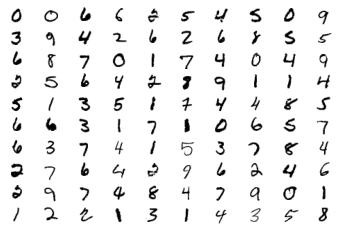

In [ ]:
# show 100 random sample of english numbers

n = random.randint(0, 70000-100)
for i in range(n, n+100):
    digit = np.array(englishNums.iloc[i])
    digit_image = digit.reshape(28, 28)
    plt.subplot(10, 10, i-n+1)
    plt.axis('off')
    plt.imshow(digit_image, cmap='binary')

plt.show()

In [ ]:
# define X and y : mnist

X = [np.array(x).reshape(28, 28, 1) for _, x in englishNums.iterrows()]
y = keras.utils.to_categorical(mnist['target'], num_classes=10)

In [ ]:
# split test and train data

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
# change data type and normalize values

xtrain = (np.array(xtrain).astype('float32')/255)
xtest = (np.array(xtest).astype('float32')/255)

In [ ]:
# Make CNN model

rom keras import layers

model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
443/443 [==============================] - 37s 83ms/step - loss: 0.7322 - accuracy: 0.7807 - val_loss: 0.0839 - val_accuracy: 0.9751
Epoch 2/15
443/443 [==============================] - 38s 85ms/step - loss: 0.1062 - accuracy: 0.9674 - val_loss: 0.0561 - val_accuracy: 0.9830
Epoch 3/15
443/443 [==============================] - 38s 85ms/step - loss: 0.0822 - accuracy: 0.9752 - val_loss: 0.0458 - val_accuracy: 0.9856
Epoch 4/15
443/443 [==============================] - 38s 85ms/step - loss: 0.0631 - accuracy: 0.9805 - val_loss: 0.0406 - val_accuracy: 0.9876
Epoch 5/15
443/443 [==============================] - 38s 86ms/step - loss: 0.0565 - accuracy: 0.9822 - val_loss: 0.0398 - val_accuracy: 0.9887
Epoch 6/15
443/443 [==============================] - 38s 86ms/step - loss: 0.0523 - accuracy: 0.9837 - val_loss: 0.0334 - val_accuracy: 0.9903
Epoch 7/15
443/443 [==============================] - 38s 86ms/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0342 - val_accuracy:

In [ ]:
loss, acc = model.evaluate(xtest, ytest)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

219/219 [==============================] - 2s 8ms/step - loss: 0.0353 - accuracy: 0.9883

Testing loss: 0.04, acc: 0.99%


In [ ]:
# Make skewed image normal form

def Deskewed(image):
    SZ = 28
    affine_flags = cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR
    m = cv2.moments(image)
    if abs(m['mu02']) < 0.01:
        return image.copy()
    else:
        skew = m['mu11'] / m['mu02']
        M = np.float32([[1, skew, (-0.5 * SZ * skew)], [0, 1, 0]])
        img = cv2.warpAffine(image, M, (SZ, SZ), flags=affine_flags)
    return img

In [ ]:
# Find all digits in photo with cv2.findContours

def Find_Numbers(image):
  s = 7
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (s, s), 0)   # delete noise from image
  thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 2)   # convert image to mask
  dilate = cv2.dilate(thresh, None, iterations=1)   # Morphological transformations

  cnts = []
  rois = []
  pts = []
  mode = cv2.RETR_EXTERNAL
  method = cv2.CHAIN_APPROX_SIMPLE
  contours, _ = cv2.findContours(dilate.copy(), mode, method)   # finde contours
  for c in contours:
      if cv2.contourArea(c) >= 100:
          cnts.append(c)

  for c in cnts:
      (x, y, w, h) = cv2.boundingRect(c)
      if h >= 3*w:
        x1 = int(x - 4*(w / 4))
        x2 = int(x + w + 4*(w / 4))
        y1 = y
        y2 = y + h
      else:
        x1 = int(x - (w / 4))
        x2 = int(x + w + (w / 4))
        y1 = y
        y2 = y + h

      roi = dilate[y1:y2, x1:x2]    # save digit image in roi
      resize = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
      rois.append(resize)
      pts.append([x1, y1, x2, y2])
      

  return rois, pts

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


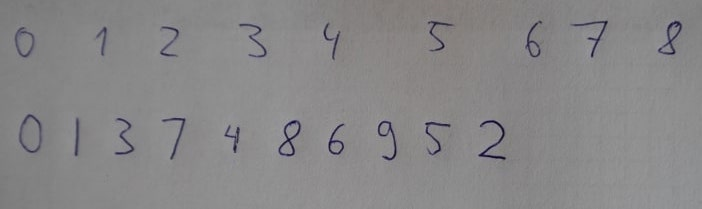

In [ ]:
# read input image

drive.mount('/content/gdrive')
main_image = cv2.imread('/content/gdrive/My Drive/Datasets/testD2.jpg')

cv2_imshow(main_image)

In [ ]:
# find digits in input image

(rois, pts) = Find_Numbers(main_image)
numbers = [np.array(Deskewed(img)).reshape(-1, 28, 28, 1).astype('float32') for img in rois]

for i in rois:
  cv2_imshow(i)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


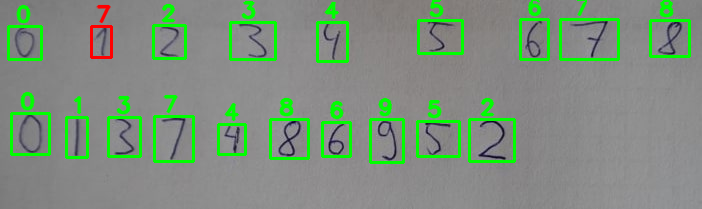

In [ ]:
# predict input digits and show result
# right predictions : green
# wrong predictions : red

pred_classes = [model.predict_classes(img)[0] for img in numbers]
true_classes = [4, 6, 5, 2, 9, 8, 3, 1, 7, 0, 1, 0, 2, 4, 3, 8, 5, 7, 6]

answer = main_image.copy()

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.7
thickness = 2
for i, (x1, y1, x2, y2) in enumerate(pts):
  if pred_classes[i] == true_classes[i]:
    color = (0, 255, 0)
  else:
    color = (0, 0, 255)
  org = (int((x1+(x2-x1)/4)), y1-5)
  cv2.rectangle(answer, (x1, y1), (x2, y2), color, 2)
  cv2.putText(answer, str(pred_classes[i]), org, font, fontScale, color, thickness, cv2.LINE_AA)

cv2_imshow(answer)